In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Open Source Vulnerability Database (OSV)

Dataset Schema:
- ecosystem: vulnerability ecosystem (e.g., GHSA, npm, OSS-Fuzz)
- vuln-id: vulnerability id (different ecosystems have different ids).
- summary: vulnerability summary.
- details: more details about the vulnerability.
- aliases: related vulnerabilities.
- modified_date: datetime of the last update.
- published_date: datetime when the vulnerability was published.
- severity: vulnerability severity (e.g., LOW, MEDIUM, HIGH)
- score: vulnerability score between 1 and 10.
- cwe_id: weakness id.
- refs: references provided for each vulnerability.
- introduced: version that introduced the vulnerability.

In [70]:
df = pd.read_csv('../data/osv/all-osv-patches.csv', escapechar="\\")
df.head()

,ecosystem,vuln_id,summary,details,aliases,modified_date,published_date,severity,score,cwe_id,refs,introduced,code_refs
0,GHSA,GHSA-p6j9-7xhc-rhwp,Hostname spoofing via backslashes in URL,### Impact\nIf using affected versions to dete...,{'CVE-2021-27516'},2021-04-05T20:33:00Z,2021-03-01T20:03:53Z,MODERATE,0.0,{'CWE-20'},{'https://github.com/advisories/GHSA-p6j9-7xhc...,NaN,{'https://github.com/medialize/URI.js/commit/a...
1,GHSA,GHSA-mq5c-prh3-3f3h,Invalid validation in `QuantizeAndDequantizeV2`,### Impact\nThe validation in `tf.raw_ops.Quan...,{'CVE-2021-29610'},2021-05-21T14:28:32Z,2021-05-21T14:28:32Z,LOW,3.6,{'CWE-665'},{'https://nvd.nist.gov/vuln/detail/CVE-2021-29...,NaN,{'https://github.com/tensorflow/tensorflow/com...
2,GHSA,GHSA-9v62-24cr-58cx,Denial of Service in node-sass,Affected versions of `node-sass` are vulnerabl...,NaN,2021-09-28T16:08:18Z,2020-09-11T21:12:39Z,MODERATE,5.9,{'CWE-400'},{'https://github.com/advisories/GHSA-9v62-24cr...,NaN,{'https://github.com/sass/node-sass/commit/338...
3,GHSA,GHSA-h6wf-hvwc-fm77,Out-of-bounds write,A remote code execution vulnerability exists i...,{'CVE-2019-0914'},2021-03-29T21:00:02Z,2021-03-29T21:00:02Z,HIGH,7.5,{'CWE-787'},{'https://github.com/chakra-core/ChakraCore/co...,NaN,{'https://github.com/chakra-core/ChakraCore/co...
4,GHSA,GHSA-9m95-8hx6-7p9v,"malicious layer with symlink entry for ""/"" all...",### Impact\n\numoci 0.4.6 and earlier can be t...,{'CVE-2021-29136'},2022-02-15T01:17:37Z,2022-02-15T01:17:37Z,MODERATE,0.0,{'CWE-20'},{'https://github.com/advisories/GHSA-9m95-8hx6...,NaN,{'https://github.com/opencontainers/umoci/comm...


#### Ecosystem Distribution

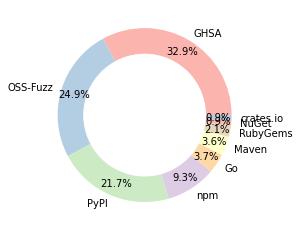

In [71]:
from palettable.colorbrewer.qualitative import Pastel1_7

my_circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(df['ecosystem'].value_counts(), 
        colors=Pastel1_7.hex_colors, 
        labels=df['ecosystem'].value_counts().keys(),
        autopct='%1.1f%%', 
        pctdistance=0.85)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [62]:
f"{len(df['vuln_id'].unique())} unique CVE entries"

'3557 unique CVE entries'

In [72]:
df = pd.read_csv('../data/osv/github-osv-patches.csv', escapechar="\\")
df.head()

,ecosystem,vuln_id,summary,details,aliases,modified_date,published_date,severity,score,cwe_id,refs,introduced,code_refs,commits
0,GHSA,GHSA-p6j9-7xhc-rhwp,Hostname spoofing via backslashes in URL,### Impact\nIf using affected versions to dete...,{'CVE-2021-27516'},2021-04-05T20:33:00Z,2021-03-01T20:03:53Z,MODERATE,0.0,{'CWE-20'},{'https://github.com/advisories/GHSA-p6j9-7xhc...,NaN,{'https://github.com/medialize/URI.js/commit/a...,{'https://github.com/medialize/URI.js/commit/a...
1,GHSA,GHSA-mq5c-prh3-3f3h,Invalid validation in `QuantizeAndDequantizeV2`,### Impact\nThe validation in `tf.raw_ops.Quan...,{'CVE-2021-29610'},2021-05-21T14:28:32Z,2021-05-21T14:28:32Z,LOW,3.6,{'CWE-665'},{'https://nvd.nist.gov/vuln/detail/CVE-2021-29...,NaN,{'https://github.com/tensorflow/tensorflow/com...,{'https://github.com/tensorflow/tensorflow/com...
2,GHSA,GHSA-9v62-24cr-58cx,Denial of Service in node-sass,Affected versions of `node-sass` are vulnerabl...,NaN,2021-09-28T16:08:18Z,2020-09-11T21:12:39Z,MODERATE,5.9,{'CWE-400'},{'https://github.com/advisories/GHSA-9v62-24cr...,NaN,{'https://github.com/sass/node-sass/commit/338...,{'https://github.com/sass/node-sass/commit/338...
3,GHSA,GHSA-h6wf-hvwc-fm77,Out-of-bounds write,A remote code execution vulnerability exists i...,{'CVE-2019-0914'},2021-03-29T21:00:02Z,2021-03-29T21:00:02Z,HIGH,7.5,{'CWE-787'},{'https://github.com/chakra-core/ChakraCore/co...,NaN,{'https://github.com/chakra-core/ChakraCore/co...,{'https://github.com/chakra-core/ChakraCore/co...
4,GHSA,GHSA-9m95-8hx6-7p9v,"malicious layer with symlink entry for ""/"" all...",### Impact\n\numoci 0.4.6 and earlier can be t...,{'CVE-2021-29136'},2022-02-15T01:17:37Z,2022-02-15T01:17:37Z,MODERATE,0.0,{'CWE-20'},{'https://github.com/advisories/GHSA-9m95-8hx6...,NaN,{'https://github.com/opencontainers/umoci/comm...,{'https://github.com/opencontainers/umoci/comm...


In [73]:
f"{len(df['vuln_id'].unique())} unique CVE entries"

'5044 unique CVE entries'

In [82]:
cwes = []
for idx, row in df.iterrows():
    if pd.notna(row['cwe_id']):
        cwes += list(eval(row['cwe_id']))
pd.Series(cwes).value_counts()

CWE-79     525
CWE-400    273
CWE-20     253
CWE-22     229
CWE-787    168
          ... 
CWE-305      1
CWE-215      1
CWE-825      1
CWE-98       1
CWE-212      1
Length: 216, dtype: int64